# PCA for visualization of handwritten digits data

PCA is often used as a technique to aid visualization of high-dimensional data. In this notebook, we'll see how this can be applied to the familiar handwritten digits dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, fixed
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

First, let's load the data and visualize a few random samples of each type of digit.

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [3]:
X = X/255.0
X.shape

(70000, 784)

In [4]:
classes = ['0', '1', '2','3', '4','5', '6', '7', '8', '9']
nclasses = len(classes)

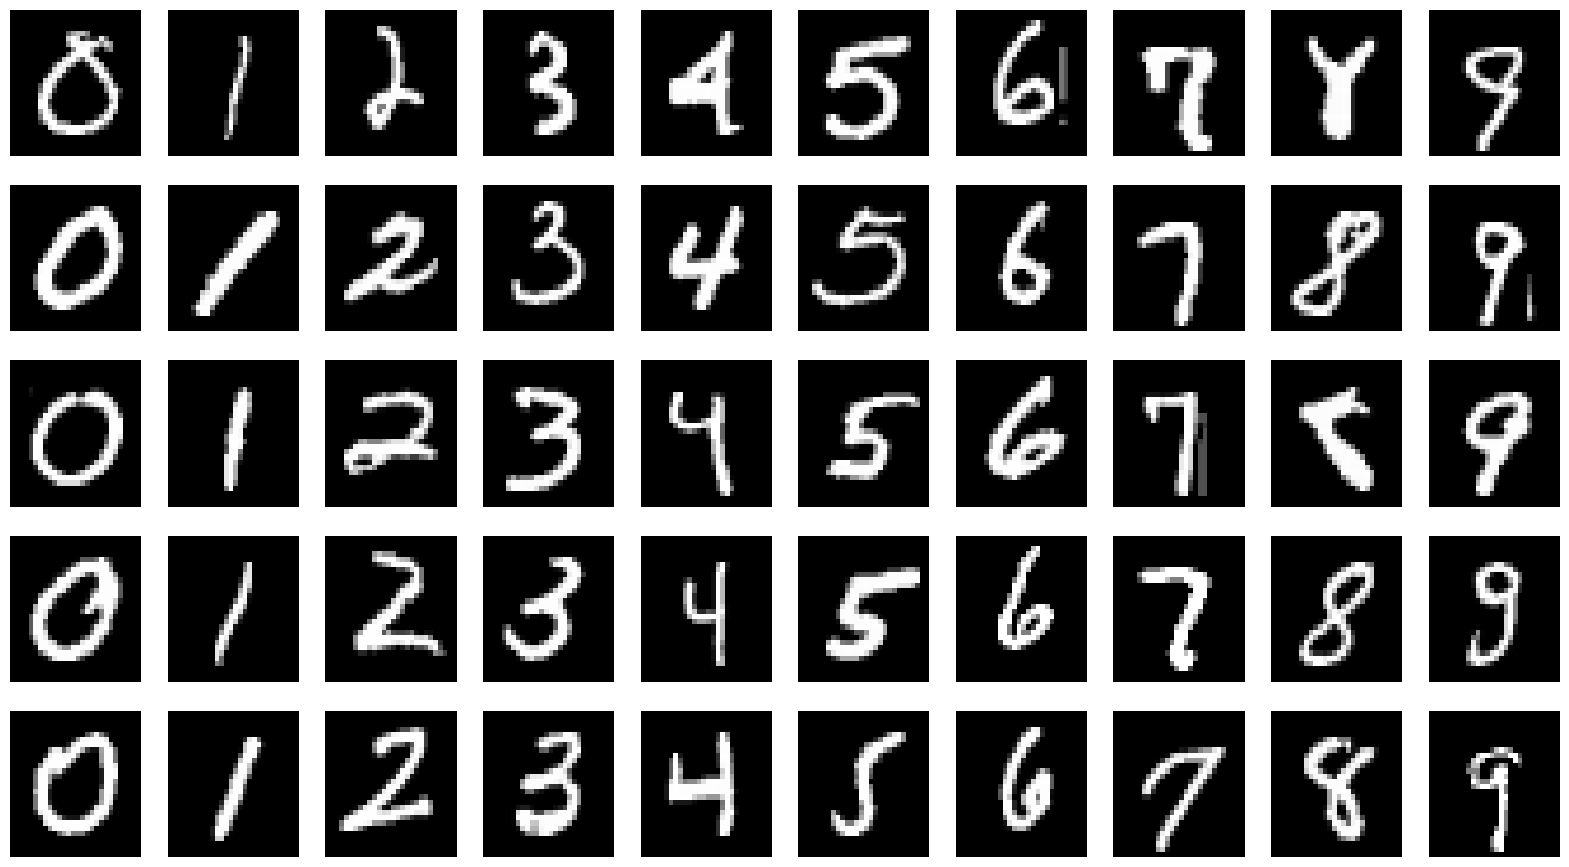

In [5]:
samples_per_class = 5

figure = plt.figure(figsize=(nclasses*2,(1+samples_per_class*2)));

for idx_cls, cls in enumerate(classes):
  idxs = np.flatnonzero(y == cls)
  idxs = np.random.choice(idxs, samples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt_idx = i * nclasses + idx_cls + 1
    p = plt.subplot(samples_per_class, nclasses, plt_idx);
    p = sns.heatmap(np.reshape(X[idx], (28,28)), cmap=plt.cm.gray,
             xticklabels=False, yticklabels=False, cbar=False);
    p = plt.axis('off');

Each sample is represented by an array of 784 (28x28) pixels.

Let us try to use PCA to project this data onto a smaller number of dimensions.

In [6]:
pca = PCA(40)
X_pca = pca.fit_transform(X)

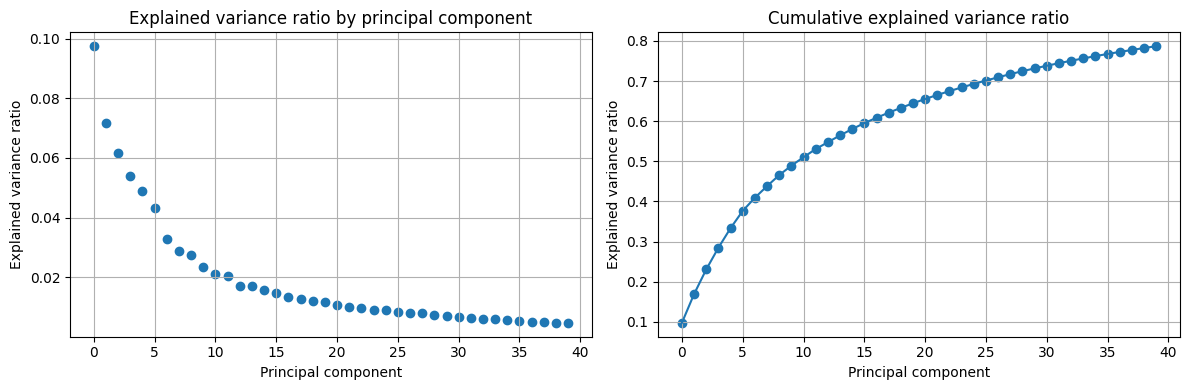

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by principal component')
plt.grid()
plt.subplot(1, 2, 2)
plt.scatter(range(pca.n_components_), pca.explained_variance_ratio_.cumsum())
plt.plot(range(pca.n_components_), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.title('Cumulative explained variance ratio')
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
X_pca.shape

(70000, 40)

Next, let's explore how each digit is built up from its principal components.

In the interactive plot below,

* The original image (sample number `index`) is shown on the top left.
* The reconstructed image using `n_components` principal components is on the top right.
* The bar plot on the bottom left shows the magnitude of each principal component in the selected image (sample number `index`).
* The image on the bottom right shows the `n_component`*th* principal component vector.

Use the interactive plot to explore the data. Make sure to look at a few examples for each digit class (by moving the `index` slider), and build it up one principal component at a time (by moving the `n_components` slider).

In [9]:
from ipywidgets import interactive
from ipywidgets import Layout
import ipywidgets as widgets

def progressive_plot(index, n_components):
    i = n_components - 1
    img = X[index]
    img_pc = X_pca[index]
    plt.figure(figsize=(12, 8))
    # Plot the original image
    plt.subplot(2, 2, 1)
    plt.imshow(img.reshape((28, 28)), cmap='gray')
    plt.title('Original image')
    plt.xticks([])
    plt.yticks([])
    # Plot the reconstructed image
    plt.subplot(2, 2, 2)
    if i == -1:
        plt.imshow(pca.mean_.reshape((28, 28)), cmap='gray')
        plt.title('Mean')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow((np.dot(img_pc[:i+1], pca.components_[:i+1])
                    + pca.mean_).reshape((28, 28)), cmap='gray')
        plt.title('Principal components 0 to {} + mean'.format(i))
        plt.xticks([])
        plt.yticks([])
    # Plot the bargraph
    plt.subplot(2, 2, 3)
    bars = plt.bar(range(pca.n_components_), img_pc, color='lightgray')
    if i >= 0:
        for j in range(n_components):
            bars[j].set_color('#6495ED')
        bars[i].set_color('r')
    plt.title('Image principal components magnitude')
    plt.xlabel('Principal component')
    plt.ylabel('Magnitude')
    # Plot the scaled principal component vector being added
    plt.subplot(2, 2, 4)
    if i == -1:
        plt.imshow(pca.mean_.reshape((28, 28)), cmap='gray')
        plt.title('Mean')
        plt.xticks([])
        plt.yticks([])
    else:
        plt.imshow((img_pc[i] * pca.components_[i]) .reshape((28, 28)), cmap='gray')
        plt.title('Principal component vector {} * {:.3g}'.format(i, img_pc[i]))
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

style = {'description_width': 'initial'}
layout = Layout(width="800px")
index = widgets.IntSlider(min=0, max=len(X) - 1, value=19325, style=style, layout=layout)
n_components = widgets.IntSlider(min=0, max=len(pca.components_), value=0, style=style, layout=layout)
interactive(progressive_plot, index=index, n_components=n_components)


interactive(children=(IntSlider(value=19325, description='index', layout=Layout(width='800px'), max=69999, sty…

Based on this interactive, can you say which samples (which class of digits) are likely to have a very large positive magnitude for the first principal component (PC 0)? Can you say which samples (which class of digits) are likely to have a very large negative magnitude for the first principal component (PC 0)?

To test your understanding, we will visualize this data. Since we have the labels, we'll color each point according to its label.

We will select some random samples to visualize:

In [10]:
random_samples = np.random.choice(np.arange(0, X_pca.shape[0]), 5000)

Then we can see them in 2D:

<ipython-input-11-2bb19689fe19>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


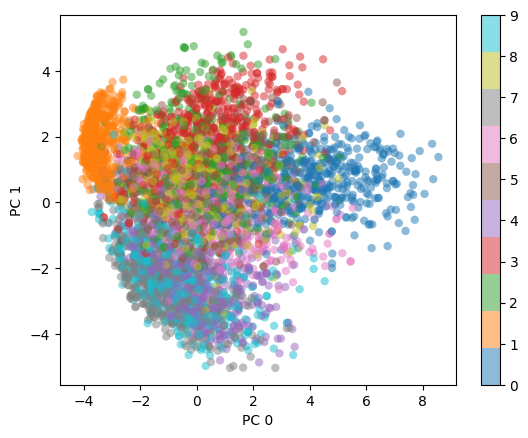

In [11]:
plt.scatter(X_pca[random_samples, 0], X_pca[random_samples, 1],
            c=y[random_samples].astype(int), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.colorbar();

And in 3D (you can move the sliders to change your point of view):

In [12]:
def plot_3D(elev=30, azim=30, X=X_pca, y=y):

  fig = plt.figure(figsize=(10,10));
  ax = fig.add_subplot(111, projection='3d');
  ax.view_init(elev=elev, azim=azim)

  p = ax.scatter3D(X[:,0], X[:,1], X[:,2], c=y, s=20,
                   alpha=0.5, cmap=plt.get_cmap('tab10', 10));
  ax.set_xlabel('PC 0');
  ax.set_ylabel('PC 1');
  ax.set_zlabel('PC 2');

  axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="50%",  # height : 50%
                   loc='center left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

  fig.colorbar(p, cax=axins);
  plt.show();

interact(plot_3D, elev=90, azim=90,
         X=fixed(X_pca[random_samples]), y=fixed(y[random_samples].astype(int)));

interactive(children=(IntSlider(value=90, description='elev', max=270, min=-90), IntSlider(value=90, descripti…

## Questions

1. Which class of digits will have a very large *positive* weight for the first principal component, and why?

2. Which class of digits will have a very large *negative* weight for the first principal component, and why?
